<a href="https://colab.research.google.com/github/whitestones011/deep_learning/blob/master/nn_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single layer neural network

$$ y = f(w_1 x_1 + w_2 x_2 + b) $$

$$ y = f\left(\sum_i w_i x_i + b\right) $$

In [ ]:
# !pip install torch torchvision

In [1]:
import torch

In [40]:
import numpy as np

In [ ]:
print(torch.__version__)

2.0.1+cu118


In [2]:
def sigmoid_activation(x):
  return 1 / (1 + torch.exp(-x))

Generate data

In [ ]:
torch.manual_seed(42)

In [ ]:
feat = torch.rand(1,5)

In [ ]:
weights = torch.rand_like(feat)

In [ ]:
bais = torch.randn(1,1)

Perceptron

In [ ]:
sigmoid_activation(torch.sum(feat*weights) + bais)

tensor([[0.9157]])

Reshaping weights matrix

In [ ]:
sigmoid_activation(torch.mm(feat, weights.view(5,1)) + bais)

tensor([[0.9157]])

# Multiple layer neural network

In [ ]:
# Define shape of NN
n_input = feat.shape[1]
n_hidden = 2
n_output = 1

In [ ]:
# Weight from input to hidden layer - random numbers from a normal distribution
w1 = torch.randn(n_input, n_hidden)
w1

tensor([[-0.4220, -1.3323],
        [-0.3639,  0.1513],
        [-0.3514, -0.7906],
        [-0.0915,  0.2352],
        [ 2.2440,  0.5817]])

In [ ]:
# Weight from hidden to output layer - random numbers from a normal distribution
w2 = torch.randn(n_hidden, n_output)
w2

tensor([[0.4528],
        [0.6410]])

In [ ]:
# Bias for hidden and output layers
b1 = torch.randn(1,n_hidden)
b2 = torch.randn(1,n_output)

In [ ]:
# Calculate hidden layer
h = sigmoid_activation(torch.mm(feat,w1) + b1)
h

tensor([[0.6150, 0.4182]])

In [ ]:
# Calculate output layer
sigmoid_activation(torch.mm(h,w2) + b2)

tensor([[0.6504]])

# MNIST

MNIST dataset consists of 28x28 pixel images of greyscale handwritten digits.

In [3]:
import matplotlib.pyplot as plt

In [4]:
from torchvision import datasets, transforms

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('/content/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [6]:
# Get a batch of training data
images, labels = next(iter(trainloader))

In [ ]:
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


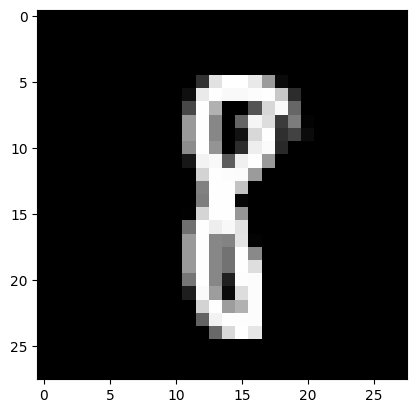

In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r');

In [ ]:
images[0].shape

torch.Size([1, 28, 28])

In [7]:
# Flatten the images
images_input = images.view(images.shape[0], -1)

In [ ]:
images_input.shape

torch.Size([64, 784])

To predict the probability of each digit, set the size of output layer as 10.

In [ ]:
# Define shape of NN
n_input = images_input.shape[1]
n_hidden = 256
n_output = 10

In [ ]:
w1 = torch.randn(n_input, n_hidden)
w2 = torch.randn(n_hidden, n_output)

b1 = torch.randn(1,n_hidden)
b2 = torch.randn(1,n_output)

In [ ]:
hidden_layer = sigmoid_activation(torch.mm(images_input, w1) + b1)

output_layer = sigmoid_activation(torch.mm(hidden_layer, w2) + b2)

To convert the output into probability distribution, use softmax function.

$$ \Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}} $$

In [8]:
def softmax(x):
  """
  Args:
    x (torch.Tensor): Pytorch tensor of shape (batch_size, n_output)
  Returns:
    The probability distribution.
  """
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

In [ ]:
probas = softmax(output_layer)

In [ ]:
# Check probabilities sum up to 1
torch.sum(probas, dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

# Model

In [9]:
from torch import nn
import torch.nn.functional as F

## Forward pass

In [10]:
# Define shape of NN
n_input = images_input.shape[1]
hidden_sizes = [128, 64]
n_output = 10

In [43]:
class MNIST_Classifier(nn.Module):
    def __init__(self, n_input, hidden_sizes, n_output):
        super().__init__()

        # Inputs to first hidden layer linear transformation
        self.hidden_1 = nn.Linear(n_input, hidden_sizes[0])

        # Inputs to second hidden layer linear transformation
        self.hidden_2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])

        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(hidden_sizes[1], n_output)

    def forward(self, x):
        # First hidden layer with ReLU activation
        x = F.relu(self.hidden_1(x))

        # Second hidden layer with ReLU activation
        x = F.relu(self.hidden_2(x))

        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)

        return x

In [44]:
model = MNIST_Classifier(n_input, hidden_sizes, n_output)

In [45]:
model

MNIST_Classifier(
  (hidden_1): Linear(in_features=784, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [36]:
# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels)
_ = images_input.resize_(64, 1, 784)

In [37]:
images_input.shape

torch.Size([64, 1, 784])

In [38]:
# Forward pass
probabiities = model.forward(images_input[0])

In [41]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

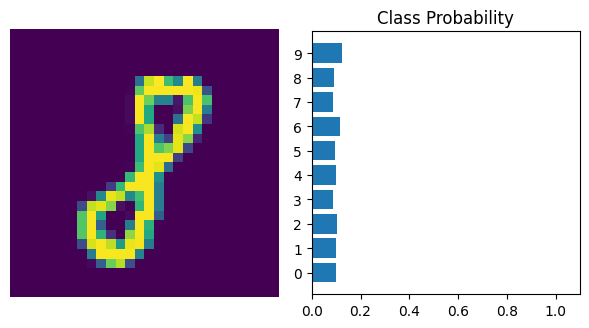

In [42]:
view_classify(images_input[0], probabiities)

As the model is not trained yet, it's not able to discriminate between classes.

## Loss function

$$ \large \ell = \frac{1}{2n}\sum_i^n{\left(y_i - \hat{y}_i\right)^2} $$